In [1]:
import os
import tifffile
import stackview
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from skimage import exposure

In [2]:
time = 1

In [3]:
root_dir = "/nfs/scratch2/shared_image_recog_ml/ap2_unnorm"
folders = [
    f for f in os.listdir(root_dir)
    if os.path.isdir(os.path.join(root_dir, f))
    and not f.startswith(".")
]
folders.sort()

selected_folder = folders[time-1]

volume_path = os.path.join(root_dir, selected_folder, "volume.tif")
volume = tifffile.imread(volume_path)

In [4]:
CME = pd.read_csv("detections_CME.csv", header = None)
Dino = pd.read_csv("detections_Dino.csv")
Comp = pd.read_csv("DetectionComparison.csv")

Dino.iloc[:, [0, 1]] +=1
Dino_time = Dino[Dino.iloc[:, 0]==time]
CME_time = CME[CME.iloc[:, 0]==time]

Comp_non = Comp[Comp["Distance"]<3.5]
Comp_non_time = Comp_non[Comp_non.iloc[:, 0]==time]

Dino_ID_non = Comp_non_time["ID (Dino)"].unique()
CME_ID_non = Comp_non_time["ID (CME)"].unique()

Dino_clean = Dino_time[~Dino_time["label_id"].isin(Dino_ID_non)].reset_index(drop=True)
CME_clean = CME_time[~CME[1].isin(CME_ID_non)].reset_index(drop=True)

/tmp/ipykernel_2049777/1481361342.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  CME_clean = CME_time[~CME[1].isin(CME_ID_non)].reset_index(drop=True)


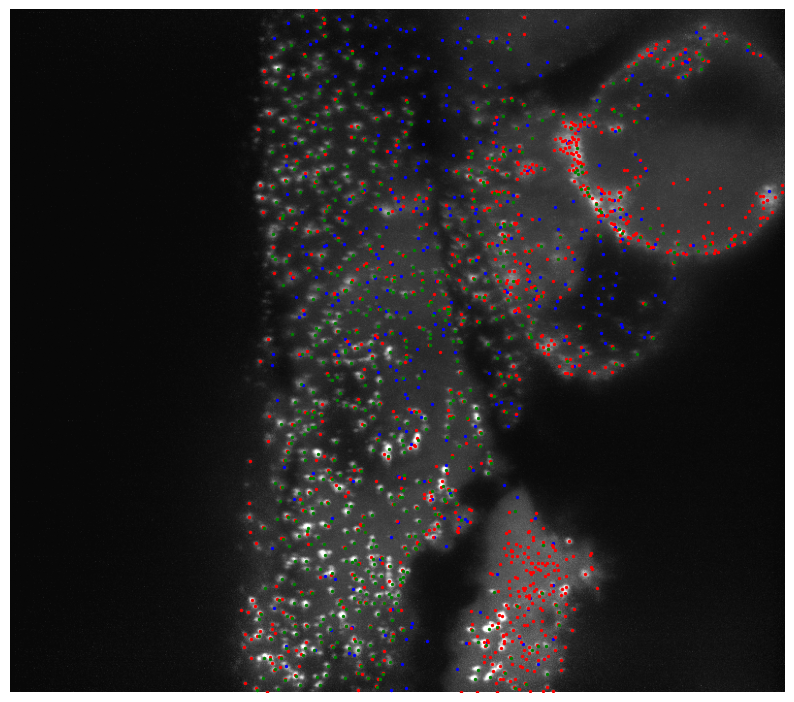

In [5]:
max_projection = np.max(volume, axis=0)

plt.figure(figsize=(10,10))
plt.imshow(max_projection, cmap="grey",vmin=0, vmax=0.5)

#plt.scatter(CME_time.iloc[:,:][2],CME_time.iloc[:,:][3], s = 2,color = "blue")  # All CME detections for a time point
#plt.scatter(Dino_time.iloc[:,:]["x"],Dino_time.iloc[:,:]["y"], s = 2, color = "red")  # All Dino detections for a time point

plt.scatter(CME_clean.iloc[:,:][2],CME_clean.iloc[:,:][3], s = 2,color = "blue")  # CME detections with matches removed for at time point
plt.scatter(Dino_clean.iloc[:,:]["x"],Dino_clean.iloc[:,:]["y"], s = 2, color = "red")  # Dino detections with matches removed for at time point

plt.scatter(Comp_non_time.iloc[:,:]["x (CME)"],Comp_non_time.iloc[:,:]["y (CME)"], s = 2, color = "green") # matched detections for a time point

plt.axis("off")
plt.show()